In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def gauss(x, A, mu, sigma):
    y=A*np.exp(-(x-mu)**2/(2.*sigma**2))
    return y
def ChebyChev(x,c1,c2,c3):
    y=c1+c2*x+c3*(2*pow(x,2)-1)
    return y
def CombineGausCheby(x,A,mu,sigma,c1,c2,c3):
    y=gauss(x, A, mu, sigma)+ChebyChev(x,c1,c2,c3)
    return y

In [3]:
Cylin='/mnt/c/Users/Christopher Crawford/Desktop/MagneticFieldFromCylinder_ABSMagnetSystemGrid_v2Exact.txt'

In [4]:
pc=pd.read_csv(Cylin,delim_whitespace=True)
T_Cy1 = pd.DataFrame(pc)
T_Cy=T_Cy1.dropna()
T_Cy=T_Cy.reset_index(drop=True)

In [5]:
T_Cy["r"]=T_Cy["r"]*100
T_Cy["z"]=T_Cy["z"]*100
T_Cy=T_Cy.round(4)
T_Cy.duplicated().any()

False

In [6]:
T_Cy

,r,z,Br,Bz
0,0.00,50.0,0.0000,-3.1489
1,0.01,50.0,0.0014,-3.1489
2,0.02,50.0,0.0027,-3.1488
3,0.03,50.0,0.0041,-3.1488
4,0.04,50.0,0.0055,-3.1487
...,...,...,...,...
501496,9.96,100.0,-0.6666,-1.5049
501497,9.97,100.0,-0.6671,-1.5043
501498,9.98,100.0,-0.6675,-1.5036
501499,9.99,100.0,-0.6679,-1.5029


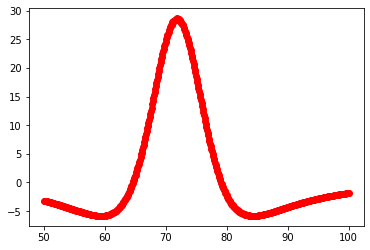

In [7]:
#plot the selected data
df = T_Cy.loc[(T_Cy['z'] >50)&(abs(T_Cy['r']) == 0.0)]
#plt.ylim(3,4)
plt.scatter(df["z"],df["Bz"], color='r')

In [8]:
# curve fit
parameters, covariance = curve_fit(gauss, df['z'], df['Bz'],[30.,70., 3])

29.621990525963923 71.871462381457 3.0674986430823417


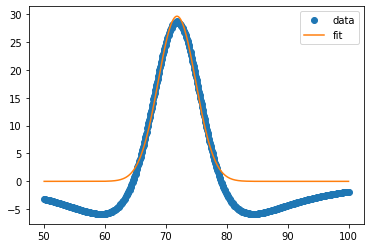

In [9]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
  
fit_y = gauss(df['z'], fit_A, fit_B, fit_C)
plt.plot(df['z'], df['Bz'], 'o', label='data')
plt.plot(df['z'], fit_y, '-', label='fit')
plt.legend()
print(fit_A,fit_B,fit_C)

In [10]:
parameters, covariance = curve_fit(CombineGausCheby, df['z'], df['Bz'],[30.,70., 3, 0.2,0.5,0.5])

35.36905744421583 71.87521110877077 3.9139310818824846 31.828740007327553 -1.0765099335719812 0.0037345067034528397


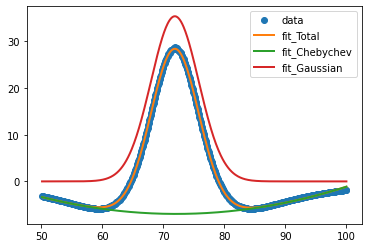

In [27]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
fit_E = parameters[4]
fit_F = parameters[5]

#from Mathmatica
#fit_A=1500;
#fit_B=90.87521110877077;
#fit_C=20.9139310818824846;
fit_y = CombineGausCheby(df['z'], fit_A, fit_B, fit_C,fit_D,fit_E,fit_F)
fit_1 = ChebyChev(df['z'],fit_D,fit_E,fit_F)
fit_2 = gauss(df['z'],fit_A,fit_B,fit_C)
plt.plot(df['z'], df['Bz'], 'o', label='data')
plt.plot(df['z'], fit_y, '-', label='fit_Total',lw=2)
plt.plot(df['z'], fit_1, '-', label='fit_Chebychev',lw=2)
plt.plot(df['z'], fit_2, '-', label='fit_Gaussian',lw=2)
plt.legend()
print(fit_A,fit_B,fit_C,fit_D,fit_E,fit_F)
#from Mathmatica
fit_A=1500;
fit_B=90.87521110877077;
fit_C=20.9139310818824846;
fit_y = CombineGausCheby(df['z'], fit_A, fit_B, fit_C,fit_D,fit_E,fit_F)
#plt.plot(df['z'], fit_y, '-', label='fit',lw=2)


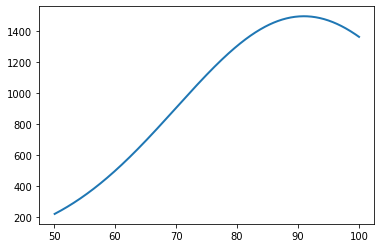

In [22]:
#from Mathmatica
fit_A=1500;
fit_B=90.87521110877077;
fit_C=20.9139310818824846;
fit_y = CombineGausCheby(df['z'], fit_A, fit_B, fit_C,fit_D,fit_E,fit_F)
plt.plot(df['z'], fit_y, '-', label='fit',lw=2)


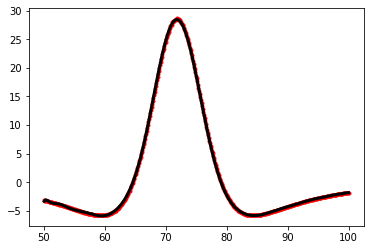

-0.07798452228869733 - 0.2179226661653541·T₁(x) -
6.025993573677369·T₂(x) + 2.8893338627519793·T₃(x) +
6.229385133283018·T₄(x) - 4.1346668669742·T₅(x) -
4.0741302524195175·T₆(x) + 3.8370024681610553·T₇(x) +
1.9957157666738374·T₈(x) - 2.837846472471221·T₉(x) -
0.7064153992589698·T₁₀(x) + 1.8262000106387761·T₁₁(x) +
0.07363250805008173·T₁₂(x) - 1.0381097660980172·T₁₃(x) +
0.13237193251485935·T₁₄(x) + 0.5532192155153608·T₁₅(x) -
0.17771281754804658·T₁₆(x) - 0.2481384258090025·T₁₇(x) +
0.11931004431617394·T₁₈(x) + 0.12942415868506726·T₁₉(x) -
0.10625907490529057·T₂₀(x)


In [19]:
p = np.polynomial.Chebyshev.fit(df['z'], df['Bz'], 20)

plt.plot(df['z'], df['Bz'], 'r.')
plt.plot(df['z'], p(df['z']), 'k-', lw=3)
plt.show()
print(p)